# Import Modules

In [12]:
import sys
sys.path.append('../')

import TAZ

In [13]:
%matplotlib widget

# Basic Fitting Example (WigBayes)

### Setting Mean Parameter Data

In [14]:
# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters:
EB    = (1e-5, 2550)
pM    = [0.12547, 0.14404]
FreqF = 1/15
Freq  = [1/8.9868, 1/8.3065]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.SpinGroups.make(l, j)
MP = TAZ.MeanParameters(targ=Target, proj=Projectile, Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, sg=SGs, EB=EB, FreqF=FreqF)

print('Printing Mean Parameters:')
print(MP)

Printing Mean Parameters:
Target Particle     = Ta-181
Projectile Particle = neutron
Channel Radius      = 7.7576830 (fm)
Energy Bounds       = 1.000e-05 < E < 2.550e+03 (eV)
False Level Density = 0.0666667 (1/eV)

                            3+          4+
Level Densities       0.111274    0.120388
Brody Parameters      1.000000    1.000000
Mean Neutron Width   44.113550   33.386970
Neutron Width DOF     1.000000    1.000000
Mean Gamma Width     55.000000   55.000000
Gamma Width DOF     250.000000  250.000000
Truncation N Width    0.000000    0.000000
Missing Fraction      0.000000    0.000000


### Sample Resonance Ladder

In [15]:
Res, Types, Missed_Res, Missed_Types = MP.sample()

In [16]:
prior, log_likelihood_prior = TAZ.PTBayes(Res, MP)
distributions = MP.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, MP.EB, distributions, MP.FreqF, prior, log_likelihood_prior)
posterior, log_likelihood = runMaster.WigBayes(return_log_likelihood=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Analysis

PT-only score =  54.95%
Wigner+PT score =  53.75%

Confusion Matrix:
     A    B  F
A   83   76  0
B  187  232  0
F    4    4  0



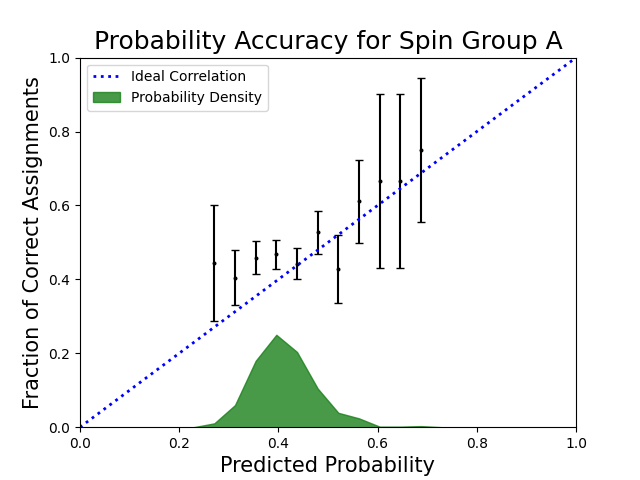

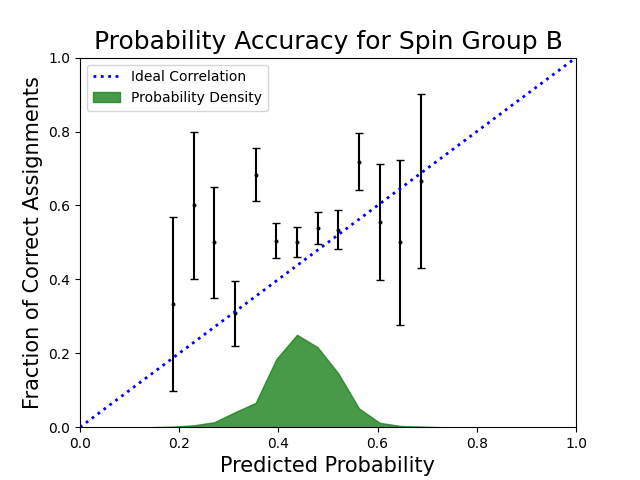

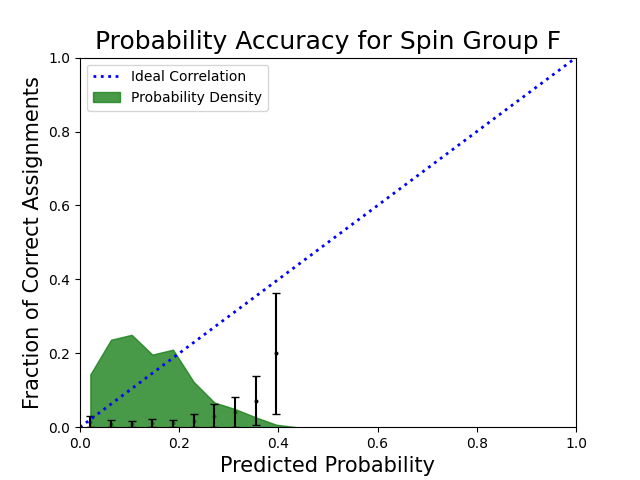

In [17]:
TAZ.analysis.PrintScore(prior, Types, 'PT-only')
TAZ.analysis.PrintScore(posterior, Types, 'Wigner+PT')
print()
TAZ.analysis.ConfusionMatrix(posterior, Types, ['A', 'B', 'F'])
print()
TAZ.analysis.ProbCorrPlot(posterior, Types, ['A', 'B', 'F'])

In [18]:
print(posterior)

[[0.36563966 0.44608157 0.18827877]
 [0.37745037 0.39506516 0.22748447]
 [0.38426246 0.40842084 0.2073167 ]
 ...
 [0.44763033 0.4800948  0.07227487]
 [0.46408954 0.45903787 0.07687259]
 [0.37786566 0.47631223 0.14582211]]


# 3 Spingroup Case

In [19]:
EB    = (1e-5, 2550)
pM    = [0.12547, 0.14404, 0.1]
FreqF = 0.0
Freq  = [1/8, 1/8.3065, 1/8]
Gnm   = [44.11355, 33.38697, 20]
Ggm   = [55.00000, 55.00000, 55.0]
dfn   = [1, 1, 1]
dfg   = [250, 250, 250]
l     = [0, 0, 1]
j     = [3.0, 4.0, 3.5]

SGs = TAZ.SpinGroups.make(l, j)
MP = TAZ.MeanParameters(targ=Target, proj=Projectile, Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, sg=SGs, EB=EB, FreqF=FreqF)

print('Printing Mean Parameters:')
print(MP)

Printing Mean Parameters:
Target Particle     = Ta-181
Projectile Particle = neutron
Channel Radius      = 7.7576830 (fm)
Energy Bounds       = 1.000e-05 < E < 2.550e+03 (eV)
False Level Density = 0.0000000 (1/eV)

                           3+          4+     7/2-
Level Densities       0.12500    0.120388    0.125
Brody Parameters      1.00000    1.000000    1.000
Mean Neutron Width   44.11355   33.386970   20.000
Neutron Width DOF     1.00000    1.000000    1.000
Mean Gamma Width     55.00000   55.000000   55.000
Gamma Width DOF     250.00000  250.000000  250.000
Truncation N Width    0.00000    0.000000    0.000
Missing Fraction      0.00000    0.000000    0.000


In [20]:
Res, Types, Missed_Res, Missed_Types = MP.sample()

In [21]:
prior, log_likelihood_prior = TAZ.PTBayes(Res, MP)
distributions = MP.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, MP.EB, distributions, MP.FreqF, prior, log_likelihood_prior)
posterior, log_likelihood = runMaster.WigBayes(return_log_likelihood=True, verbose=True)

Preparing for Merge group, 0
Finished spingroup 0 level-spacing calculation
Finished spingroup 0 CP calculation
Finished spingroup 0 WigBayes calculation
Preparing for Merge group, 1
Finished spingroup 1 level-spacing calculation
Finished spingroup 1 CP calculation
Finished spingroup 1 WigBayes calculation
Preparing for Merge group, 2
Finished spingroup 2 level-spacing calculation
Finished spingroup 2 CP calculation
Finished spingroup 2 WigBayes calculation
Preparing for Merge group, 999!!!
Finished spingroup 999 level-spacing calculation


../TAZ/Levels.py:635: RuntimeWarning: divide by zero encountered in power
  combined_sg_probs[:,-1] = np.prod(sg_probs[:,1,:], axis=1) * self.Prior[:,-1] ** (1-self.G)
../TAZ/Levels.py:635: RuntimeWarning: invalid value encountered in multiply
  combined_sg_probs[:,-1] = np.prod(sg_probs[:,1,:], axis=1) * self.Prior[:,-1] ** (1-self.G)


Finished spingroup 999 CP calculation
Finished!


### Analysis

In [22]:
print(posterior)

[[5.12643456e-001 4.87356544e-001 0.00000000e+000 0.00000000e+000]
 [4.96877770e-001 5.03122230e-001 0.00000000e+000 0.00000000e+000]
 [4.92287578e-001 5.07712422e-001 0.00000000e+000 0.00000000e+000]
 ...
 [4.78793232e-001 5.21206768e-001 7.76409806e-032 0.00000000e+000]
 [2.59200201e-002 3.24616402e-002 9.41618340e-001 0.00000000e+000]
 [5.86801426e-001 4.13198574e-001 1.89806442e-159 0.00000000e+000]]


PT-only score =  65.26%
Wigner+PT score =  66.24%

Confusion Matrix:
         A    B    C  False
A      164  142    0      0
B      123  141    0      0
C       22   26  309      0
False    0    0    0      0



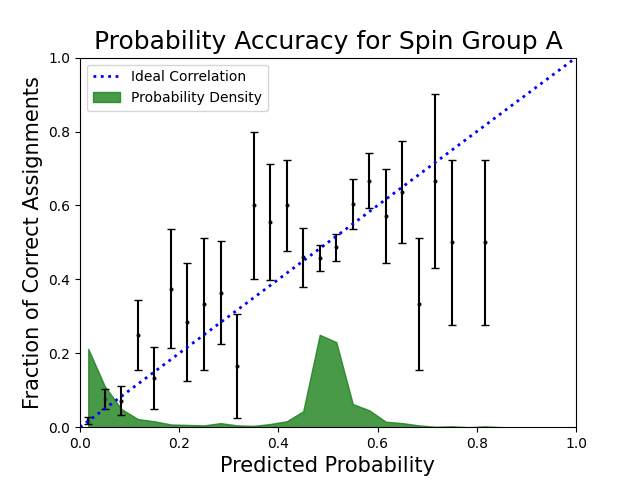

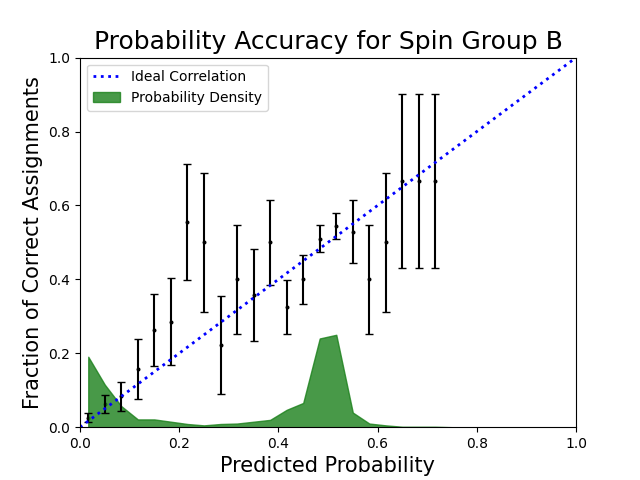

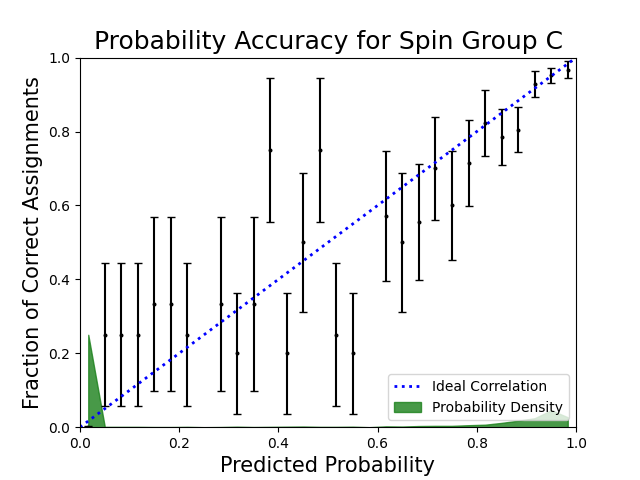

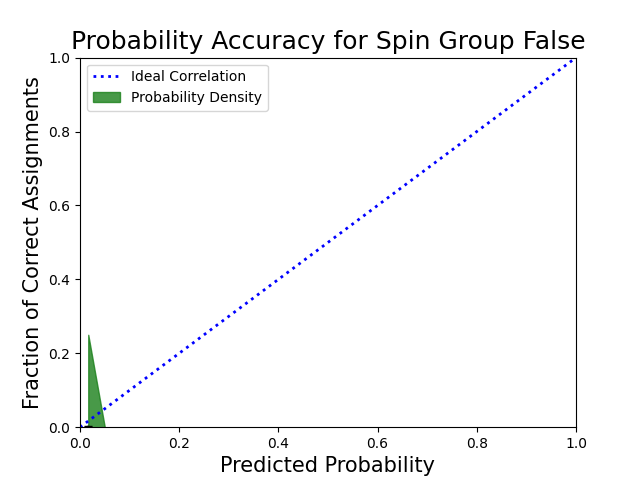

In [23]:
TAZ.analysis.PrintScore(prior, Types, 'PT-only')
TAZ.analysis.PrintScore(posterior, Types, 'Wigner+PT')
print()
TAZ.analysis.ConfusionMatrix(posterior, Types)
print()
TAZ.analysis.ProbCorrPlot(posterior, Types)

# Basic Spingroup Sampling (WigSample)

...